<a href="https://colab.research.google.com/github/michalis0/MGT-502-Data-Science-and-Machine-Learning/blob/main/02_Regression/Lab_3_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORT YOUR LIBRARIES HERE
# Import standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import to load arff file from url
from scipy.io import arff
import urllib.request
import io


# Sklearn import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

# Lab 3

During the first Lab you have explored the dataset on crop yields, during the second lab you tried deploying simple web-based applications via Streamlit. Today we will take a step further and try predicting crop yields based on the average temperature, precipitation and pesticides. Additionally, we will create a GUI using Streamlit to allow any user to get predictions by entering their input.

## Exploring the dataset on crop yields

In 2020, between 720 million and 811 million persons worldwide were suffering from hunger (see [SDG Goal 2](https://www.un.org/sustainabledevelopment/hunger/) Zero Hunger). Given the ongoing growth of the world population, it is imperative to comprehend crop yield at a global level in order to tackle food security issues and mitigate the effects of climate change.

The Agricultural yield depends on weather conditions (rain, temperature, etc) and fertilizers use. Having precise information regarding the historical crop yield is critical for making informed decisions regarding agricultural risk management and future projections.

Some E4S publications on the topic of food:
- [Threats to Nitrogen Fertilizer, Opportunities to Cultivate Sustainable Practices?](https://e4s.center/resources/reports/threats-to-nitrogen-fertilizer-opportunities-to-cultivate-sustainable-practices/)
- [True cost of food as a lever to transform the Swiss food system](https://e4s.center/resources/reports/true-cost-of-food-as-a-lever-to-transform-the-swiss-food-system/)

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Sustainable_Development_Goal_02ZeroHunger.svg/800px-Sustainable_Development_Goal_02ZeroHunger.svg.png' width="200">

We will use data obtained from the [FAO](http://www.fao.org/home/en/) (Food and Agriculture Organization) and [World Data Bank](https://data.worldbank.org/), and gathered in the [Crop Yield Prediction Dataset](https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset).

This data may help us to predict the crop yields using the temperature, rain fall, and type of crops.


### Question 1: Load and Discover the dataset

- Load the data in a dataframe. The url link is provided below. Display the first 10 observations and the types of data.  

In [ ]:
url_yield = 'https://raw.githubusercontent.com/michalis0/MGT-502-Data-Science-and-Machine-Learning/main/data/yield_df.csv'

# YOUR CODE HERE
df_yield= pd.read_csv(url_yield)
df_yield.head(10)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485,121.0,16.37
1,Albania,Potatoes,1990,66667,1485,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485,121.0,16.37
3,Albania,Sorghum,1990,12500,1485,121.0,16.37
4,Albania,Soybeans,1990,7000,1485,121.0,16.37
5,Albania,Wheat,1990,30197,1485,121.0,16.37
6,Albania,Maize,1991,29068,1485,121.0,15.36
7,Albania,Potatoes,1991,77818,1485,121.0,15.36
8,Albania,"Rice, paddy",1991,28538,1485,121.0,15.36
9,Albania,Sorghum,1991,6667,1485,121.0,15.36


The first 10 rows of the dataset can give us a general idea about the data it contains and possible ways to use this data.

The column "Area" clearly refers to countries and not regions of the world as it might seem from the name of the column. "Item" refers to the type of crops. No surprises and unexpected values in the "Year" column. "hg/ha_yield" corresponds to crop yields (hectogram per hectare). The next column contains information concerning average rainfall in mm per year. The following column has the data on pesticides used in tonnes. Finally, the last column is the average temperature.

It is easy to notice that all the columns have different scales - years, hectograms per hectare, mm per year, tonnes and degrees. It means that later we will have to rescale the data in order to make it comparable and suitable for the future analysis. Moreover, there are some categorical variables, namely "Area" and "Iteam", which will have to be encoded.




*   Check for missing values.



In [ ]:
# YOUR CODE HERE
df_yield.isna().sum().sum()

0


*   Check the types of data

In [ ]:
# YOUR CODE HERE
df_yield.dtypes

Area                              object
Item                              object
Year                               int64
hg/ha_yield                        int64
average_rain_fall_mm_per_year      int64
pesticides_tonnes                float64
avg_temp                         float64
dtype: object

There are two columns that contain objects, three columns that contain integers and two columns that contain numeric variables that can store decimal values (float).



*   Display the list of variables the dataset contains.


In [ ]:
# YOUR CODE HERE
df_yield.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

- Print the list of countries ('Area') and years available in the dataset.

In [ ]:
# YOUR CODE HERE
df_yield['Area'].unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'Colombia', 'Croatia',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon',
       'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi',
       'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico',
       'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway',
       'Pakistan', 'Papua New Guinea', 'Peru', 'Pola

There are no misspelled countries, duplicates or values that are not country names.

- Print the list of 'Item' in the dataset. You should obtain a list of 10 crops, which are among the most consumed in the world

In [ ]:
# YOUR CODE HERE
df_yield['Item'].unique()

array(['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams'],
      dtype=object)

- Display summary statistics for the columns: 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes','avg_temp'. How many observations do we have?

*Hint:* You can extract the columns 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes','avg_temp' in a new dataframe since we will reuse it in the following questions

In [ ]:
# YOUR CODE HERE
new_df = df_yield[['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes','avg_temp']]
new_df.describe()

,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.00000,28242.000000,28242.000000
mean,77053.332094,1149.05598,37076.909344,20.542627
std,84956.612897,709.81215,59958.784665,6.312051
min,50.000000,51.00000,0.040000,1.300000
25%,19919.250000,593.00000,1702.000000,16.702500
50%,38295.000000,1083.00000,17529.440000,21.510000
75%,104676.750000,1668.00000,48687.880000,26.000000
max,501412.000000,3240.00000,367778.000000,30.650000


We have an equal number of observations in every column, namely, 28242. It mean that there are no missing values in the dataset and it is ready to be worked on.

Yet, the fact that the variables in question have very different minimums, maximums and means can be problemtic. Therefore, we will need to rescale the data.



*   What else can be helpful to understand the data at hand?



In [ ]:
# YOUR CODE HERE
#list of years
df_yield['Year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013])

## Visualization

- Display a heatmap of the correlation matrix between the columns: 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes','avg_temp'

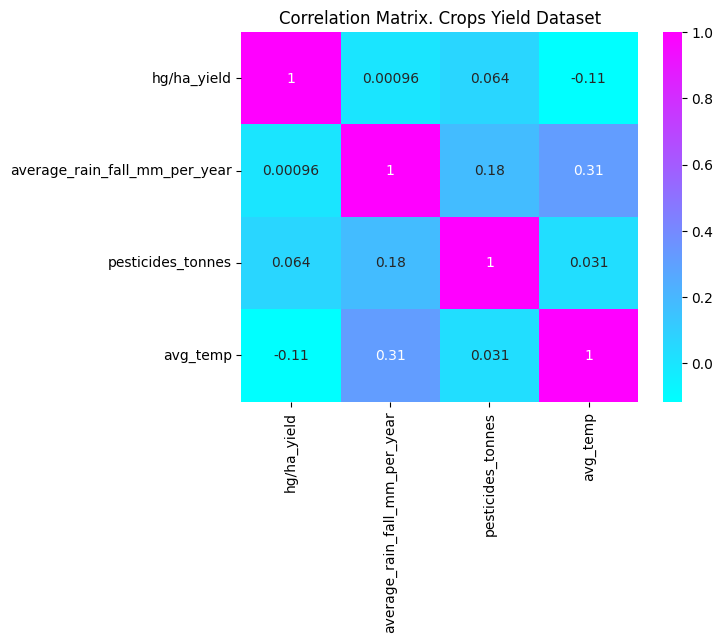

In [ ]:
# YOUR CODE HERE
corr_matrix = new_df.corr()
plt.title("Correlation Matrix. Crops Yield Dataset")
sns.heatmap(corr_matrix, annot=True, cmap='cool')
plt.show()

The matrix above illustrates the correlation coefficients between the variables under study with the highest correlation marked by darker blue and purple shades and the weakest correlation marked by lighter blue shades.

Diagonally we observe bright purple squares representing correlation equal to 1. That is because diagonally we have correlations between the same variables, for example, average temperature and average temperature. Naturally, they are perfectly correlated, because they are identical.

The only negative correlation that we observe on the heatmap is that of "avg_temp" (average temperature) and "hg/ha_yield" (crop yield). This is an unsettling notion in the light of the current global warming: higher temperatures are associated with lower crop yields. Yet, it is too early to make any definitive conclusions. We need to carry out a more profound analysis to confirm the nature and importance of this relation.

The strongest positive correlation is between "avg_temp" (average temperature) and "average_rain_fall_mm_per_year" (average rainfall). From the course on the science of climate change we know that higher temperatures do not always mean heavier rainfall: it may depend on wind patterns, ocean currents, and even elevation might play a role. There are places on our planet where the temperatures are relatively high and rainflal is abundant, at the same time, there are many examples when hot places seldom see any rainfall at all and are notorious for their dryness. The relatively high positive correlation between average temperatures and average rainfall that we observe, might simply stem from the fact that the sample in not representative of the entire planet with its vast variety of climatic zones. The data at our disposal covers only a part of the Earth and, therefore, might reveal patterns that are not necessarily universal. Let us check this assumption by looking at the number of countries ("Area") in the dataset at hand:

In [ ]:
len(df_yield['Area'].unique())

101

As anticipated, the list is not complete. There are 195 countries in the world, and 193 of them are members of the UN. In the dataset we only have 101 countries, which is slightly more than a half. We have reasons to suspect that outcomes of this research might be influenced by the incompleteness of data.

- Create a boxplot of the columns: 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes','avg_temp'

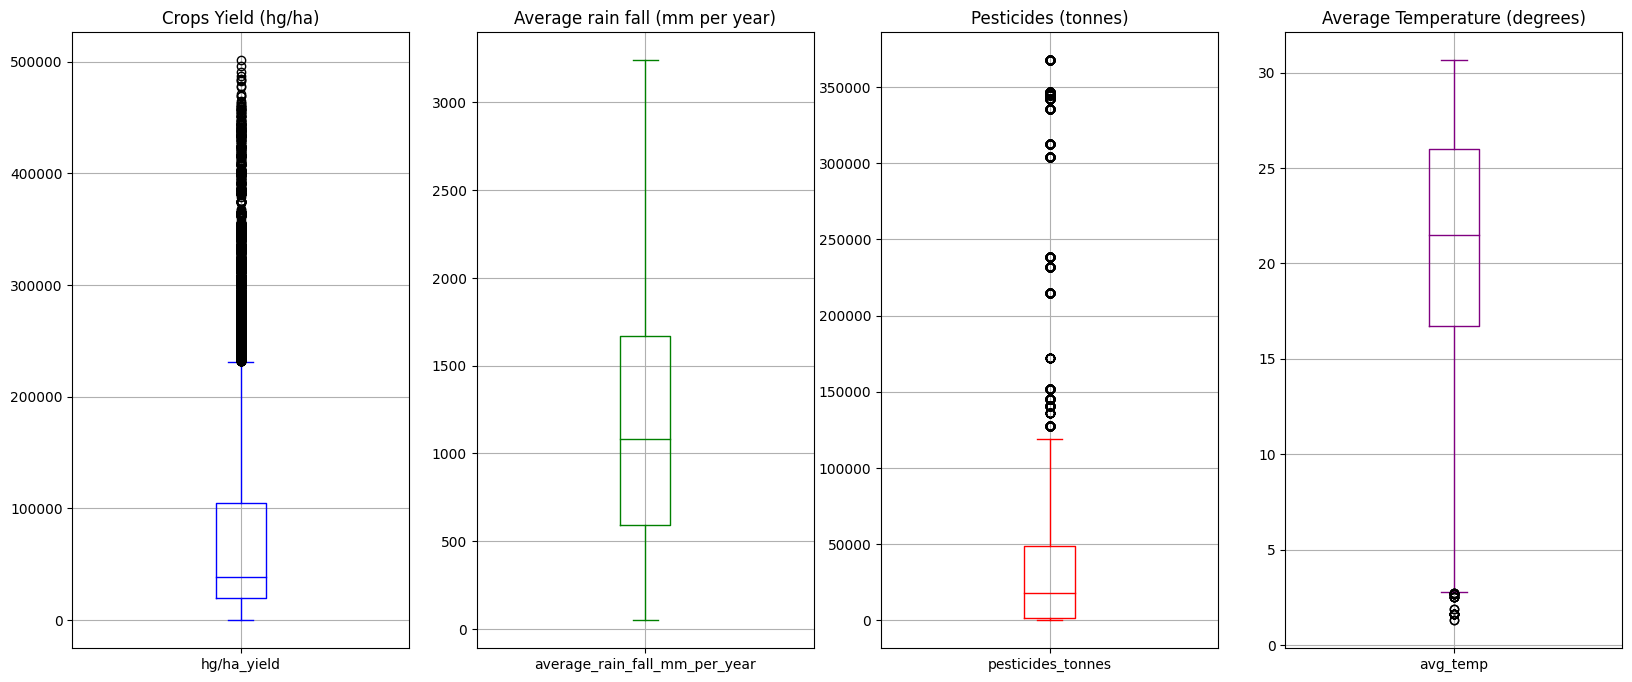

In [ ]:
# YOUR CODE HERE
# Create a figure
figure, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 8))

# Create 4 separate boxplots and mark them by different colors
new_df[['hg/ha_yield']].boxplot(ax=axes[0], color = 'blue')
new_df[['average_rain_fall_mm_per_year']].boxplot(ax=axes[1], color = 'green')
new_df[['pesticides_tonnes']].boxplot(ax=axes[2], color = 'red')
new_df[['avg_temp']].boxplot(ax=axes[3], color = 'purple')

# Assign titles to each of the boxplot
axes[0].set_title('Crops Yield (hg/ha)')
axes[1].set_title('Average rain fall (mm per year)')
axes[2].set_title('Pesticides (tonnes)')
axes[3].set_title('Average Temperature (degrees)')

plt.show()

The boxplots displayed above can help visualize the median, quartiles and outliers from the dataset.

The first boxplot (in blue) corresponds to the crops yield. We see that the middle 50% of the values are placed low (the body of the box). The median is placed very low, which indicates that scarce yields are more common than big ones. The whiskers of the box represent the range of the data without taking into account the outliers. The abundance of black circles indicates that there are many outliers, and all of them lie above the box and its whiskers.

The second boxplot (green) illustrates the distribution of the values in the column concerning average rainfall. Both the box and its whiskers are longer than in the previous example. The line representing the median crosses the box almost precisely in the middle. In case of the average rainfall, we do not see any outliers on the boxplot. We can conclude that data on the average rainfall is more evenly distributed than the data on the crops yield.

The third boxplot (in red) shows the median, quartiles and outliers of the data on pesticides. The box neatly fits between 0 and 50 000 with one whisker going down to 0 and another one extending to approximately 12 000. The median crosses the boxes in its lower half. Thus, we can say that in the majority of observations pesticides are not used excessively. Yet, there are some outliers protruding up to roughly 370 000 tonnes.

The last boxplot (purple) represents the data on the average temperatures. Unlike in all the previous cases, the purple box is located in the upper part of the graph, indicating that hotter temperatures prevail in the given dataset. The range, indicated by the long whiskers, is pretty big. There are several outliers close to 0 degrees.

- Create a pairplot of the columns: 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes','avg_temp'

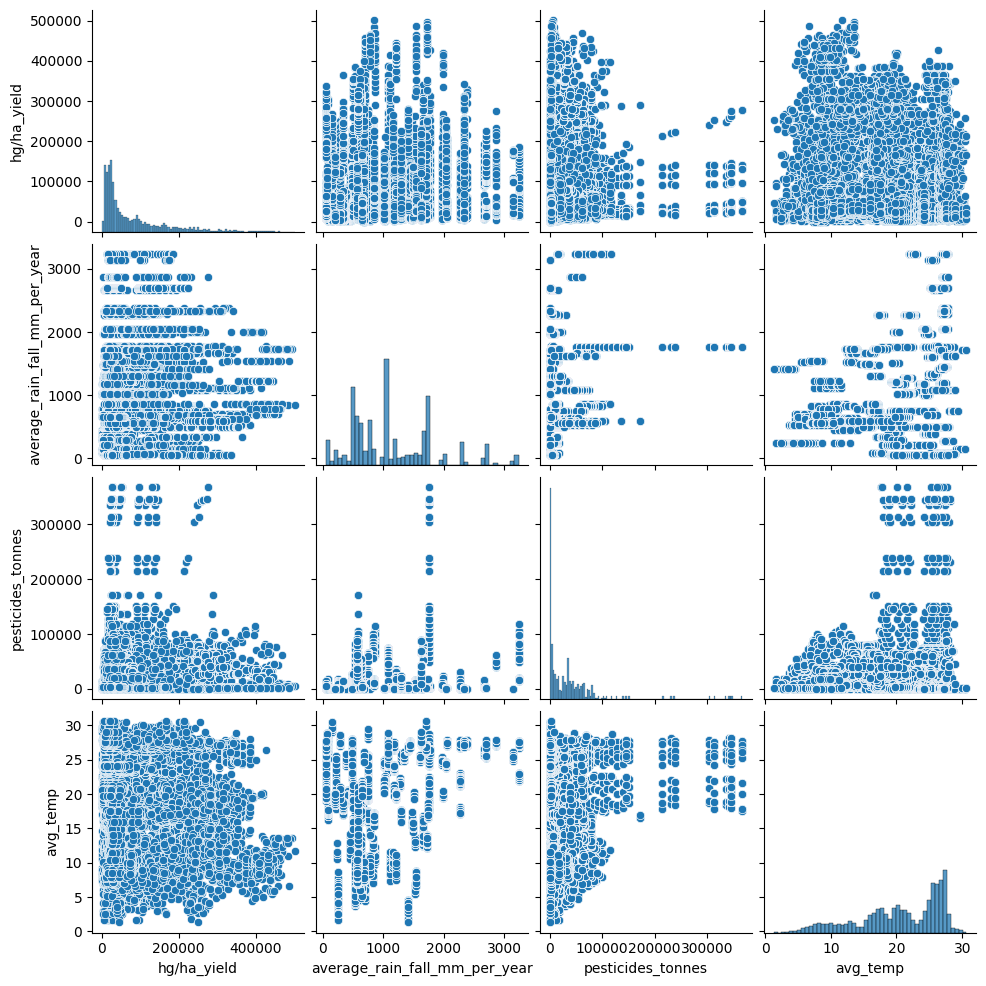

In [ ]:
# YOUR CODE HERE
sns.pairplot(data = new_df)

Looking at the diagonal squares, we can see the distribution of each variable. It is evident that the data is skewed, especially, pesticides and crops yield. This might necessitate transformation (for example, log-transformation) or the use of non-parametric statistical tests. Yet, to be sure, we need to calculate skewness for each of these variables and make a decision.

The rest of the plots show relationships between different variables. We see no linear relationships, however we can observe some clustering of points and, thus, make an assumption that later in our analysis we will find that one variable can be to a certain degree explained by the other.

- The pairplot above has uncovered a potential problem with our data. Let's try to analize the distribution of the variables further to assess how grave the effect of skewness can be.

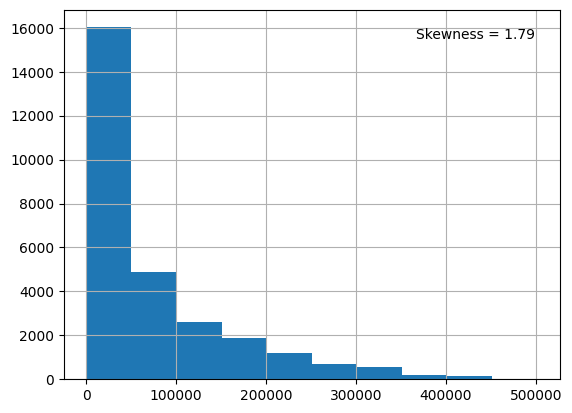

In [ ]:
# YOUR CODE HERE
#Distribution of hg/ha_yield

from scipy.stats import skew

skewness = skew(new_df['hg/ha_yield'])

new_df['hg/ha_yield'].hist()

plt.text(0.95, 0.95, 'Skewness = {:.2f}'.format(skewness),
         transform=plt.gca().transAxes, ha='right', va='top')
plt.show()

The data on crops yield is asymmetric with low values prevailing over high values. Yet, skewness of the data is not high enough to deem it necessary to perform a log-transformation (we remember from the last semester the rule of thumb that if the absolute value of skewness is lower that 3, transformation is not needed).

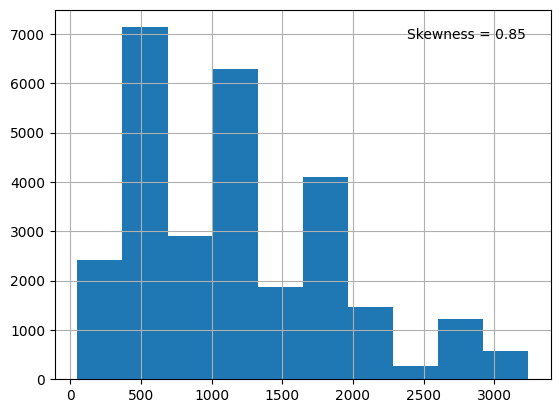

In [ ]:
#Distribution of average_rain_fall_mm_per_year

skewness1 = skew(new_df['average_rain_fall_mm_per_year'])

new_df['average_rain_fall_mm_per_year'].hist()

plt.text(0.95, 0.95, 'Skewness = {:.2f}'.format(skewness1),
         transform=plt.gca().transAxes, ha='right', va='top')
plt.show()

Once again we see that the data is asymmetric, however, the skewness value is not high enough to necessitate transformation.

It is worth noting that, unlike in the previous example, we cannot say that the lowest values are the most commom ones or vice versa. There are certain ranges that have many more observations falling within them (400-650; 1000-1350; 1600-1950) than other ranges.

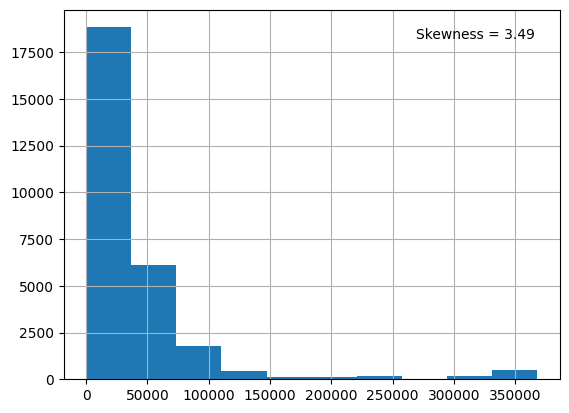

In [ ]:
#Distribution of pesticides_tonnes

skewness2 = skew(new_df['pesticides_tonnes'])

new_df['pesticides_tonnes'].hist()

plt.text(0.95, 0.95, 'Skewness = {:.2f}'.format(skewness2),
         transform=plt.gca().transAxes, ha='right', va='top')
plt.show()

The data on the use of pesticides is very asymmetric with the skewness of 3.49. Ideally, this variable should be log-transformed:

new_df['pesticides_tonnes'] = np.log(new_df['pesticides_tonnes'])

However, the skewness is only slightly higher than the benchmark 3, and this benchmark is more of a recommendation than a strict rule, therefore it will not be a crime if I leave it as it is. Another motivation not to perform log-transfrormation in this case is that it would be harder to interpret the results. Without log-transformation the process of interpretation of coefficients and other metrics is intuitive.

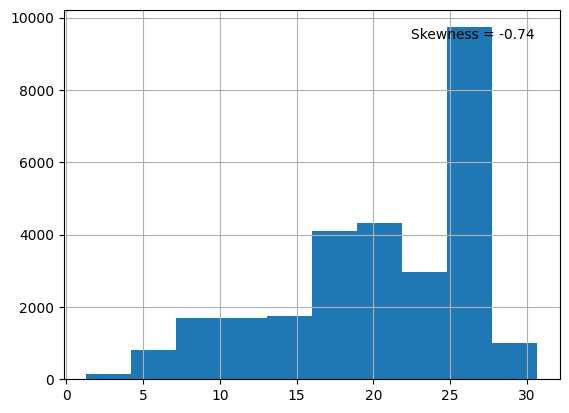

In [ ]:
#Distribution of pesticides_tonnes

skewness3 = skew(new_df['avg_temp'])

new_df['avg_temp'].hist()

plt.text(0.95, 0.95, 'Skewness = {:.2f}'.format(skewness3),
         transform=plt.gca().transAxes, ha='right', va='top')
plt.show()

The data on average temperatures is asymmetric, however, the skewness is relatively low, so there is no need for log-transfromation. Unlike any previous variable, 'avg_temp' has a negative skewness, which indicates that it is leaning towards higher values (there are more observations with high values).

Even though it is not necessary, for the sake of curiousity, we can have a look at the different crops present in the dataset and their shares in the yield. The best way to visualize is it to plot a pie chart.



*   We can have a look at the different crops present in the dataset and their shares in the yield. The best way to visualize is it to plot a pie chart.



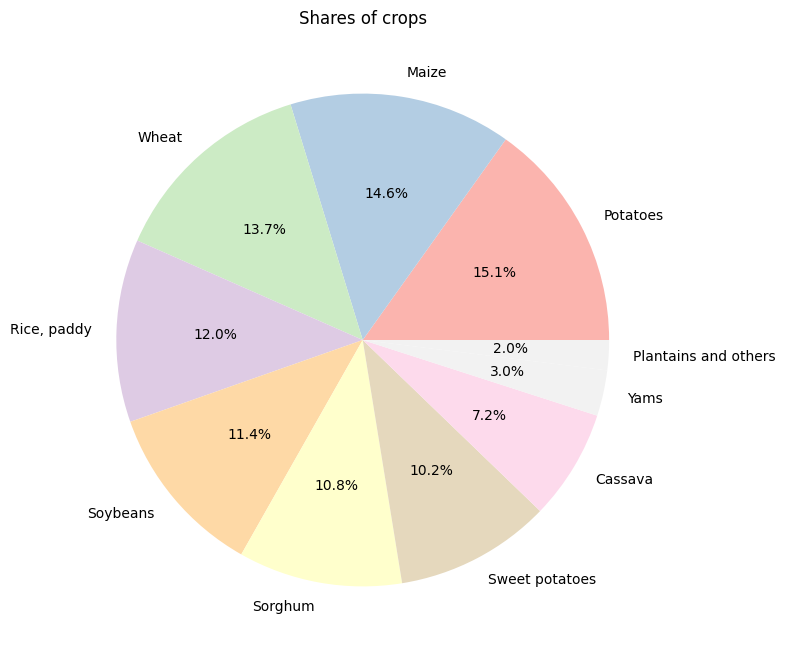

In [ ]:
# YOUR CODE HERE
# pie chart

data = df_yield['Item'].value_counts()

plt.figure(figsize=(8, 8))

plt.title('Shares of crops')

cmap = plt.get_cmap('Pastel1')
colors = cmap(range(len(data)))

plt.pie(data.values, labels=data.index, colors=colors, autopct='%1.1f%%')

plt.show()



*   Feel free to extend your data analysis and visualisation by adding plots, graphs, maps, etc. These results will be useful for the next lab, when we will explore Streamlit.



In [ ]:
# YOUR CODE HERE


## Regression

We will try to predict the crop yields (column 'hg/ha_yield') using as features: 'Item', 'average_rain_fall_mm_per_year', 'pesticides_tonnes','avg_temp'

*Step 1.* Extract your features and outcome

In [ ]:
# YOUR CODE HERE
X = #features
y = #dependant variable

We will try to predict crops yield (y) using the data on the type of crop, average annual rainfall, pesticides and average temperature (X). Since there are more than 1 predictors, our model is a multivariate regression.

*Step 2* Split between training and test set 1 point
Note: Use as option: test_size=0.2, random_state=42, shuffle=True

In [ ]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test =

The parameter test_size set to 0.2 means that 80% of the data will be used to train the model, and the rest 20% will be used to test it. We also set shuffle to 'True' in order to mix up all the values before splitting them and thus avoid possible bias that might exist in the way the values are ordered in the dataset (for example, if the values are stored in a chronological order).

*Step 3* Encode the column 'Item' using LabelEncoder.
Note: After training your encoder, you need to transform the values of both the training and test set

In [ ]:
# YOUR CODE HERE

le = LabelEncoder()

#Encode the 'Item' column

As mentioned previously, one of the variables in the current dataset is a categorical variable. Instead of simply dropping it and, possibly, losing a valuable predictor, I encoded it, so that former names of crops have become numbers. This step allows the categorical variable to be used in a regression, and at the same time does not add any complexity to the model.

*Step 4.* Rescale your features using MinMaxScaler.

In [ ]:
#Define the scaler

#Fit the scaler

#Transform the train and the test set

Additionally, we can transfrom arrays into pd dataframe, because it will be easier to apply visualization tools to this data when it is in the format of a dataframe. It is not necessary, but it is convenient to do so.

In [ ]:
# Transform arrays into dataframes
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

*Step 5*. Build and train a multivariate linear regression model

In [ ]:
# Set up the model
model = LinearRegression()
# Use fit
model.fit(X_train, y_train)
# Check the score/accuracy

# Print the coefficients of the linear model

What is the  𝑅2, mean absolute error, and mean square error on the training set? On the test set? What do you think?

In [ ]:
# Predict:
predictions = model.predict(X_test)

# Compute the MAE, the MSE and the R^2 on the test set
mae =
mse =
r2 =

# Compute the MAE, the MSE and the R^2 on the training set
predictions_train =
mae_train =
mse_train =
r2_train =

print(f"MAE test set: {mae:0.2f}; MAE training set: {mae_train:0.2f};")
print(f"MSE test set: {mse:0.2f}; MSE training set: {mse_train:0.2f};")
print(f"R\u00b2 test set: {r2:0.2f}; R\u00b2 training set: {r2_train:0.2f};" )

## Streamlit app: Regression

In [ ]:
import streamlit as st
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load data
url = 'https://raw.githubusercontent.com/michalis0/MGT-502-Data-Science-and-Machine-Learning/main/data/yield_df.csv'
df_yield = pd.read_csv(url)

st.title('Crop Yield Prediction')

# Sidebar for user input
st.sidebar.title('Input Parameters')
item = st.sidebar.selectbox('Item', df_yield['Item'].unique())
avg_rainfall = st.sidebar.number_input('Average Rainfall (mm/year)', value=0.0)
pesticides = st.sidebar.number_input('Pesticides (tonnes)', value=0.0)
avg_temp = st.sidebar.number_input('Average Temperature', value=0.0)

# Preprocess data
X = df_yield[['Item', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]
y = df_yield['hg/ha_yield']

# Encode 'Item' column
le = LabelEncoder()
X['Item'] = le.fit_transform(X['Item'])

# Define the scaler
scaler = MinMaxScaler()
# Fit and transform
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=True)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make prediction
user_input = [[le.transform([item])[0], avg_rainfall, pesticides, avg_temp]]
user_input_scaled = scaler.transform(user_input)
prediction = model.predict(user_input_scaled)

st.subheader('Prediction:')
st.write('Predicted Yield:', prediction[0])

# Evaluate model
predictions_test = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions_test)
mse = mean_squared_error(y_test, predictions_test)
r2 = r2_score(y_test, predictions_test)

st.subheader('Model Evaluation:')
st.write(f"MAE test set: {mae:.2f}")
st.write(f"MSE test set: {mse:.2f}")
st.write(f"R\u00b2 test set: {r2:.2f}")

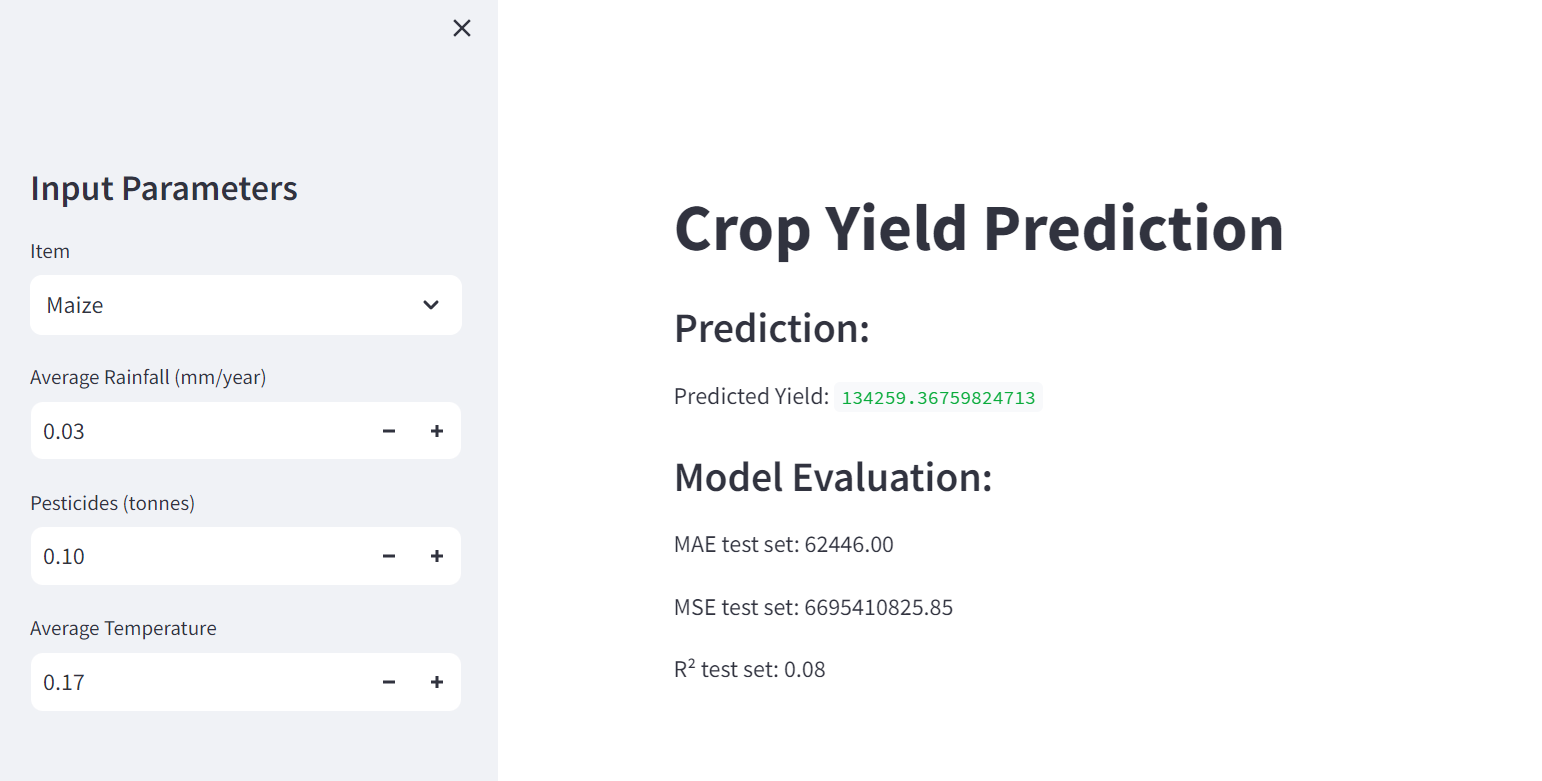

Have fun!


*   You can try to round up the output and add measurement unit (tonnes/ha);
*   You can change the design, for example, by adding a background photo.



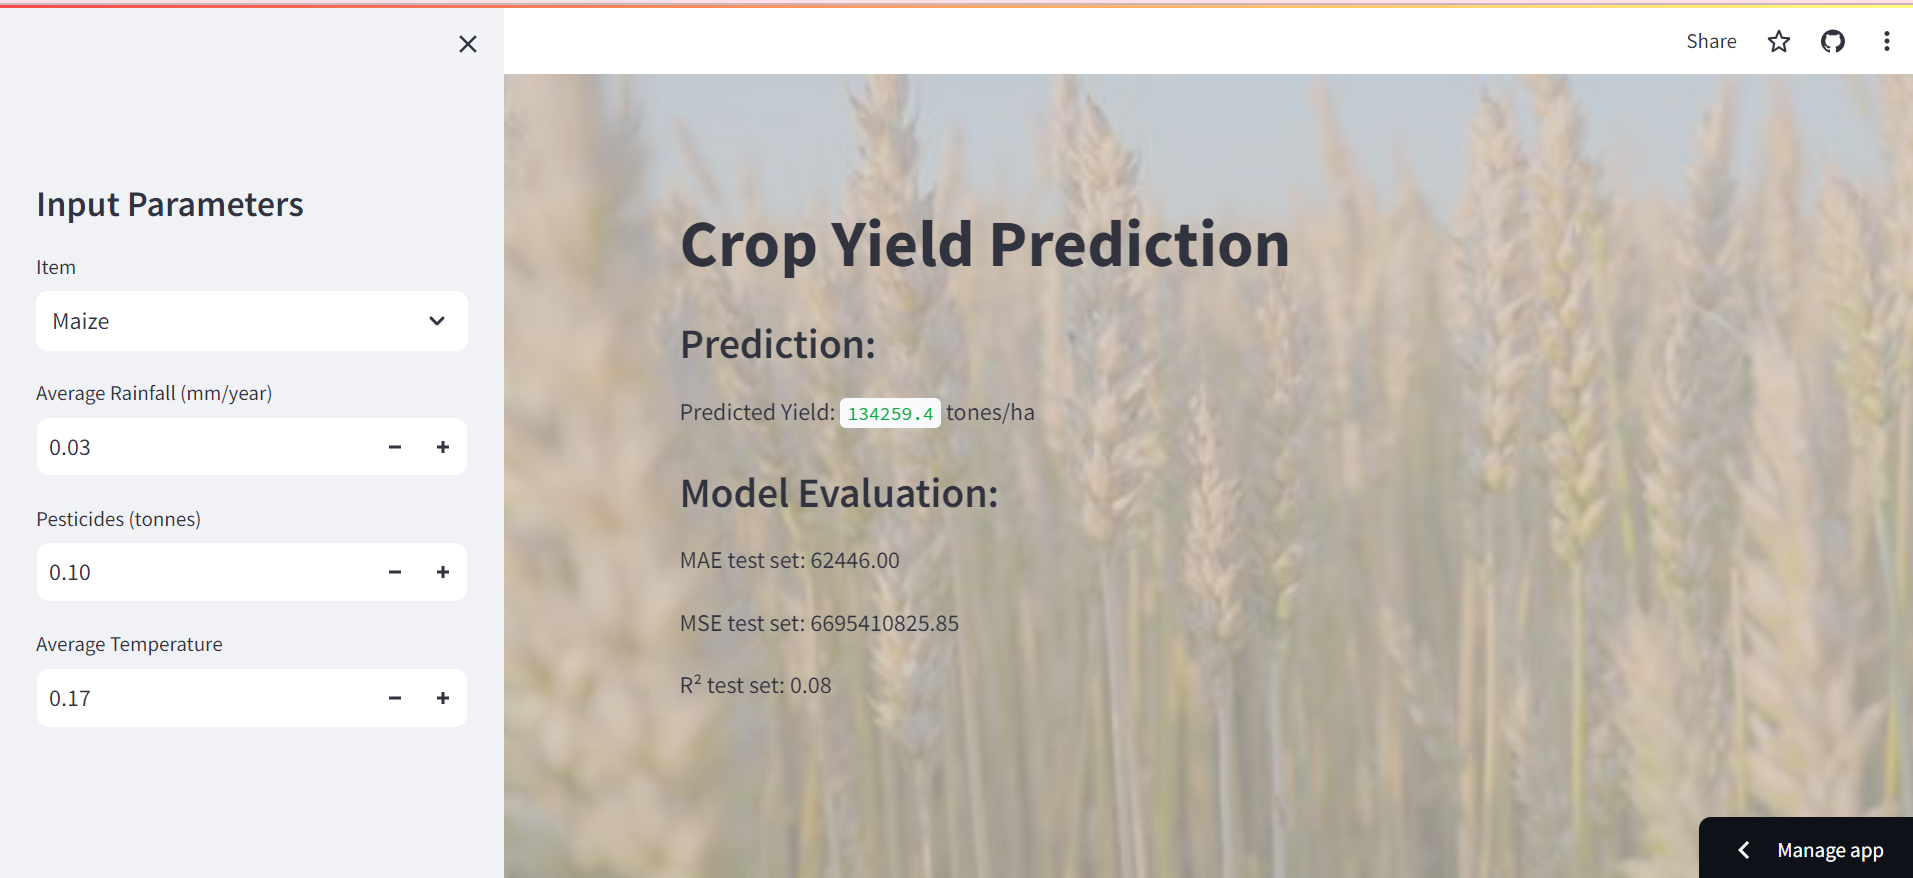